In [1]:
import sys 
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams.update({'font.size': 20})
%load_ext autoreload
%autoreload 2

In [2]:
eta = 0.01
mu = 1
p=1
ptil=0.8
delta=p-ptil

## approximation
# rhoa2 = lambda sig, lam : 1-2*eta*lam
# rhob2 = lambda sig, lam : 1-2*eta*((ptil*delta)/(lam*sig**2))
# m = lambda sig, lam : (lam+(ptil*delta)/(lam*sig**2))/2
# rhoc2 = lambda sig, lam: 1-2*eta*(m(sig, lam)-np.emath.sqrt(m(sig, lam)**2-(mu*ptil*p)/(sig**2)))

# exact
rhoa2 = lambda sig, lam : (1-eta*lam)**2
rhob2 = lambda sig, lam : (1-eta*((ptil*delta)/(lam*sig**2)))**2
m = lambda sig, lam : (lam+(ptil*delta)/(lam*sig**2))/2
rhoc2 = lambda sig, lam: np.absolute(1-eta*(m(sig, lam)-np.emath.sqrt(m(sig, lam)**2-(mu*ptil*p)/(sig**2))))**2
i_comp = lambda sig, lam: np.iscomplex(np.emath.sqrt(m(sig, lam)**2-(mu*ptil*p)/(sig**2)))

In [3]:
# threshold for when \rho_c is imaginary
gamroot_low = lambda lam : (lam**2/delta**2/ptil)*(2-delta-2*np.sqrt(1-delta))
gamroot_high = lambda lam : (lam**2/delta**2/ptil)*(2-delta+2*np.sqrt(1-delta))
gam_bound = lambda lam : (lam**2/(p*ptil))

In [4]:
# optimal value for lambda
lam_opt = lambda sig : np.sqrt(ptil*delta/sig**2)

C:\Users\evbec\AppData\Local\Temp\ipykernel_2872\3523433868.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


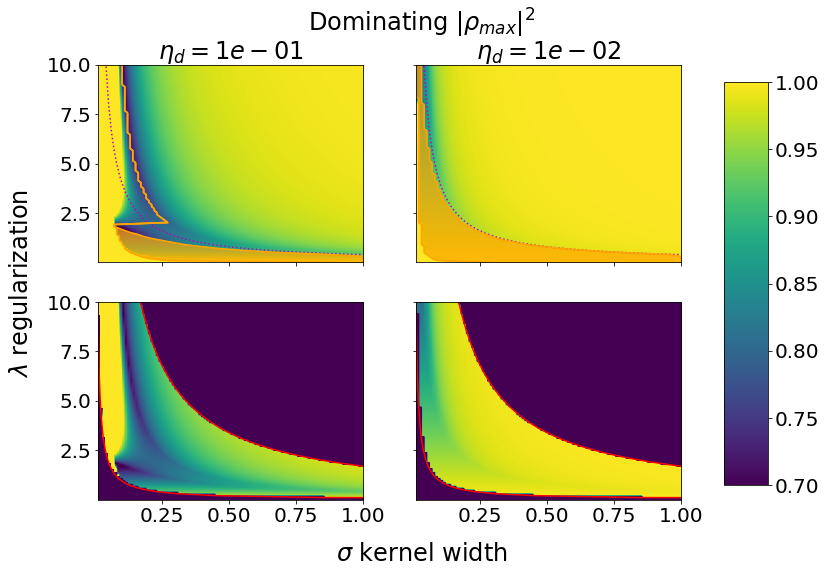

In [72]:
fig, ax = plt.subplots(2,2,figsize=(12,8), sharex=True,sharey=True)
# fig.set_tight_layout(True)
nplt=100
sigmin, sigmax = 0.01, 1
lammin, lammax = 0.01, 10

for i, eta in enumerate([0.1, 0.01]):      
    x0 = np.linspace(sigmin, sigmax, nplt)
    x1 = np.linspace(lammin, lammax, nplt)
    X0mat, X1mat = np.meshgrid(x0, x1)  
    X = np.column_stack((X0mat.ravel(), X1mat.ravel())) 
    a_vals = map(rhoa2, X[:,0], X[:,1])
    b_vals = map(rhob2, X[:,0], X[:,1])
    # b_vals = [0 for _ in X[:,0]]
    c_vals = map(rhoc2, X[:,0], X[:,1])
    eigvals = [max(a,b,c) for a,b,c in zip(a_vals,b_vals,c_vals)]
    # plot dominating eigenvalues
    Zmat = np.reshape(eigvals, (nplt,nplt))    
    pos = ax[0,i].imshow(Zmat,extent=[sigmin,sigmax,lammin,lammax], vmin=0.7, vmax=1, aspect='auto', origin='lower')
    # plot theoretical line for optimal lambda
    ax[0,i].plot(x0,list(map(lam_opt,x0)), c='m', ls='dotted')
    # plot actual optimal
    best_sig = [np.argmin(Zmat[i,:]) for i in range(nplt)]
    best_sig2 = [np.argmin(np.flip(Zmat[i,:])) for i in range(nplt)]
    ax[0,i].plot(x0[best_sig], x1, c='orange')
    ax[0,i].plot(np.flip(x0)[best_sig2], x1, c='orange')
    ax[0,i].fill_betweenx(x1, x0[best_sig], np.flip(x0)[best_sig2], color='orange', alpha=0.7)

    plt.xlim(sigmin,sigmax)
    plt.ylim(lammin,lammax)
    ax[0,i].set_title(f'$\eta_d={eta:1.0e}$')

    # mask only complex eigenvalues
    complex_mask = list(map(i_comp, X[:,0], X[:,1]))
    Zmask = np.reshape(complex_mask, (nplt,nplt))
    ax[1,i].imshow(Zmat*Zmask,extent=[sigmin,sigmax,lammin,lammax], vmin=0.7, vmax=1, aspect='auto', origin='lower')
    # plot theoretical thresholds for when \rho_c imaginary
    ax[1,i].plot(1/np.sqrt(list(map(gamroot_high,x1))), x1, c='r')
    ax[1,i].plot(1/np.sqrt(list(map(gamroot_low,x1))), x1, c='r')
    # ax[i].plot(1/np.sqrt(list(map(gam_bound,x1))), x1, c='m')

fig.supxlabel('$\sigma$ kernel width')
fig.supylabel('$\lambda$ regularization')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(pos, cax=cbar_ax)
fig.suptitle('Dominating $|\\rho_{max}|^2$')
fig.show()

C:\Users\evbec\AppData\Local\Temp\ipykernel_2692\3848746287.py:53: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(right=0.8)
C:\Users\evbec\AppData\Local\Temp\ipykernel_2692\3848746287.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


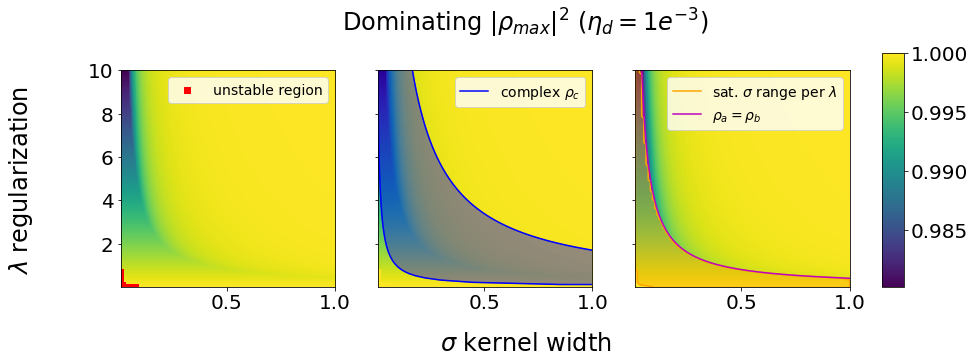

In [13]:
fig, ax = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)
fig.set_constrained_layout(True)
nplt=100
sigmin, sigmax = 0.01, 1
lammin, lammax = 0.01, 10

for i, eta in enumerate([0.001]):      
    x0 = np.linspace(sigmin, sigmax, nplt)
    x1 = np.linspace(lammin, lammax, nplt)
    X0mat, X1mat = np.meshgrid(x0, x1)  
    X = np.column_stack((X0mat.ravel(), X1mat.ravel())) 
    a_vals = map(rhoa2, X[:,0], X[:,1])
    b_vals = map(rhob2, X[:,0], X[:,1])
    # b_vals = [0 for _ in X[:,0]]
    c_vals = map(rhoc2, X[:,0], X[:,1])
    eigvals = [max(a,b,c) for a,b,c in zip(a_vals,b_vals,c_vals)]
    curr_min = min(eigvals)
    # plot dominating eigenvalues
    Zmat = np.reshape(eigvals, (nplt,nplt))    
    Zmask = np.ma.masked_where(Zmat>1,Zmat)
    ax[0].imshow(np.ones_like(Zmat), cmap='autumn', extent=[sigmin,sigmax,lammin,lammax], vmin=1,vmax=1, aspect='0.1', origin='lower')
    pos = ax[0].imshow(Zmask, extent=[sigmin,sigmax,lammin,lammax], vmin=curr_min, vmax=1, aspect='0.1', origin='lower')
    ax[0].scatter(0,0,c='r',label='unstable region', marker='s')
    ax[0].legend(prop={'size': 14})
    # ax[0].contourf(X0mat, X1mat, Zmask, origin='lower', nchunks=20)
    
    # mask only complex eigenvalues
    # complex_mask = list(map(i_comp, X[:,0], X[:,1]))
    # Zmask = np.reshape(complex_mask, (nplt,nplt))
    ax[1].imshow(Zmat,extent=[sigmin,sigmax,lammin,lammax], vmin=curr_min, vmax=1, aspect='0.1', origin='lower')
    # plot theoretical thresholds for when \rho_c imaginary
    ax[1].plot(1/np.sqrt(list(map(gamroot_high,x1))), x1, c='b')
    ax[1].plot(1/np.sqrt(list(map(gamroot_low,x1))), x1, c='b', label='complex $\\rho_c$')
    ax[1].fill_betweenx(x1, 1/np.sqrt(list(map(gamroot_high,x1))), 1/np.sqrt(list(map(gamroot_low,x1))), color='b', alpha=0.4)
    # ax[i].plot(1/np.sqrt(list(map(gam_bound,x1))), x1, c='m')
    ax[1].legend(prop={'size': 14})

    # plot actual optimal
    pos = ax[2].imshow(Zmat,extent=[sigmin,sigmax,lammin,lammax], vmin=curr_min, vmax=1, aspect='0.1', origin='lower')
    best_sig = [np.argmin(Zmat[i,:]) for i in range(nplt)]
    best_sig2 = [np.argmin(np.flip(Zmat[i,:])) for i in range(nplt)]
    ax[2].plot(x0[best_sig], x1, c='orange')
    ax[2].plot(np.flip(x0)[best_sig2], x1, c='orange', label='sat. $\sigma$ range per $\lambda$')
    ax[2].fill_betweenx(x1, x0[best_sig], np.flip(x0)[best_sig2], color='orange', alpha=0.4)
    # plot theoretical line for optimal lambda
    ax[2].plot(x0,list(map(lam_opt,x0)), c='m', label='$\\rho_a=\\rho_b$')
    ax[2].legend(prop={'size': 14})
    plt.xlim(sigmin,sigmax)
    plt.ylim(lammin,lammax)

fig.supxlabel('$\sigma$ kernel width')
fig.supylabel('$\lambda$ regularization')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.20, 0.02, 0.65])
fig.colorbar(pos, cax=cbar_ax)
fig.suptitle('Dominating $|\\rho_{max}|^2$ ($\eta_d=1e^{-3}$)')
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\evbec\AppData\Local\Temp\ipykernel_2692\4227949299.py:62: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(right=0.8)
C:\Users\evbec\AppData\Local\Temp\ipykernel_2692\4227949299.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


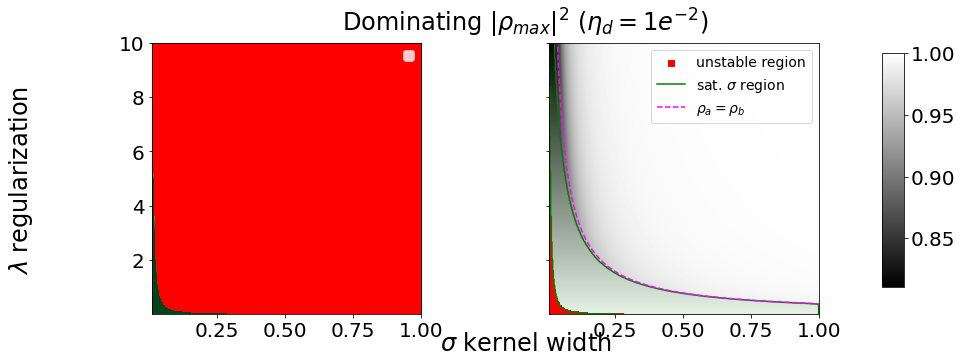

In [46]:
fig, ax = plt.subplots(1,2,figsize=(15,5), sharex=True, sharey=True)
fig.set_constrained_layout(True)
nplt=400
sigmin, sigmax = 0.01, 1
lammin, lammax = 0.01, 10

for i, eta in enumerate([0.01]):      
    x0 = np.linspace(sigmin, sigmax, nplt)
    x1 = np.linspace(lammin, lammax, nplt)
    X0mat, X1mat = np.meshgrid(x0, x1)  
    X = np.column_stack((X0mat.ravel(), X1mat.ravel())) 
    a_vals = list(map(rhoa2, X[:,0], X[:,1]))
    b_vals = list(map(rhob2, X[:,0], X[:,1]))
    # b_vals = [0 for _ in X[:,0]]
    c_vals = list(map(rhoc2, X[:,0], X[:,1]))
    eigvals = [max(a,b,c) for a,b,c in zip(a_vals,b_vals,c_vals)]
    which_eigvals = [np.argmax((a,b,c)) for a,b,c in zip(a_vals,b_vals,c_vals)]
    curr_min = min(eigvals)
    # plot dominating eigenvalues
    Zmat = np.reshape(eigvals, (nplt,nplt))  
    Zwhich = np.reshape(which_eigvals, (nplt,nplt))
    unstable_mask = np.ma.masked_where(Zmat>1, Zmat)
    stable_mask = np.ma.masked_where(Zmat<=1, Zmat)
    a_mask = np.ma.masked_where(Zwhich==0, Zmat)
    ax[0].imshow(a_mask, cmap='Blues', extent=[sigmin,sigmax,lammin,lammax], 
                        vmin=curr_min, vmax=1, aspect='0.1', origin='lower')
    b_mask = np.ma.masked_where(Zwhich==1, Zmat)
    ax[0].imshow(b_mask, cmap='Oranges', extent=[sigmin,sigmax,lammin,lammax], 
                    vmin=curr_min, vmax=1, aspect='0.1', origin='lower')
    c_mask = np.ma.masked_where(Zwhich==2, Zmat)
    ax[0].imshow(c_mask, cmap='Greens', extent=[sigmin,sigmax,lammin,lammax], 
                vmin=curr_min, vmax=1, aspect='0.1', origin='lower')
    ax[0].imshow(unstable_mask, cmap='autumn', extent=[sigmin,sigmax,lammin,lammax], vmin=1,vmax=1, 
                 aspect='0.1', origin='lower')
    # # plot theoretical thresholds for when \rho_c imaginary
    # ax[0].plot(1/np.sqrt(list(map(gamroot_high,x1))), x1, c='b')
    # ax[0].plot(1/np.sqrt(list(map(gamroot_low,x1))), x1, c='b', label='complex $\\rho_c$')
    # ax[0].fill_betweenx(x1, 1/np.sqrt(list(map(gamroot_high,x1))), 
    #                     1/np.sqrt(list(map(gamroot_low,x1))), color='b', alpha=0.1)
    # # ax[i].plot(1/np.sqrt(list(map(gam_bound,x1))), x1, c='m')
    ax[0].legend(prop={'size': 14})

    # plot actual optimal
    ax[1].imshow(np.ones_like(Zmat), cmap='autumn', extent=[sigmin,sigmax,lammin,lammax], vmin=1,vmax=1, 
                 aspect='0.1', origin='lower')
    ax[1].scatter(0,0,c='r',label='unstable region', marker='s')
    pos = ax[1].imshow(Zmask,cmap='gray', extent=[sigmin,sigmax,lammin,lammax], vmin=curr_min, vmax=1, 
                       aspect='0.1', origin='lower')
    best_sig = [np.argmin(Zmat[i,:]) for i in range(nplt)]
    best_sig2 = [np.argmin(np.flip(Zmat[i,:])) for i in range(nplt)]
    ax[1].plot(x0[best_sig], x1, c='green')
    ax[1].plot(np.flip(x0)[best_sig2], x1, c='green', label='sat. $\sigma$ region')
    ax[1].fill_betweenx(x1, x0[best_sig], np.flip(x0)[best_sig2], color='green', alpha=0.1)
    # plot theoretical line for optimal lambda
    ax[1].plot(x0,list(map(lam_opt,x0)), c='magenta', label='$\\rho_a=\\rho_b$', ls='dashed')
    ax[1].legend(prop={'size': 14})
    plt.xlim(sigmin,sigmax)
    plt.ylim(lammin,lammax)

fig.supxlabel('$\sigma$ kernel width')
fig.supylabel('$\lambda$ regularization')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.20, 0.02, 0.65])
fig.colorbar(pos, cax=cbar_ax)
fig.suptitle('Dominating $|\\rho_{max}|^2$ ($\eta_d=1e^{-2}$)')
fig.show()